In [23]:
import matplotlib.pyplot as plt
import Data 
from ipywidgets import AppLayout,IntSlider,Button,HTML, layout,VBox
from ipywidgets import interact, interact_manual

In [17]:
# define the widgets and build UI
header = HTML("<h1>Suitable Site for Factory</h1>", layout=Layout(height='auto'))
header.style.text_align='center'
Geology = IntSlider(description="Geology",value = 60)
Transport = IntSlider(description="Transport", value= 30)
Population = IntSlider(description="Population", value=10)
Run = Button(description="Execute")

In [18]:
out = HTML(
    value='',
    layout=Layout(width='auto', height='auto')
)

In [25]:
right = HTML(
    value='',
    layout=Layout(width='auto', height='auto')
)

In [ ]:
# read the criteria layers  from file.
geology_layer = Data.Read_data('Geology.txt').read()
tansport_layer = Data.Read_data('Transport.txt').read()
population_layer = Data.Read_data('Pop.txt').read()

In [ ]:
#  get  weights of every layer from the widgets
geology_weight = Geology.value / 100
Transport_weight = Transport.value /100
Pop_weight = Population.value /100

In [19]:
#  check if the layers have the same length
length = len(geology_layer)
if all(len(lst) == length for lst in [geology_layer, tansport_layer, population_layer]):
    print(True)

# compute the weighted overlay:
def compute_weighed_overlay(geo_data,trans_data,pop_data):
    #  create  a new list to store the new pixel values
    weighted_layer = []
    for i in range(len(geo_data)):
        row = []
        for j in range(len(geo_data[0])):
            row.append(geo_data[i][j] *0.5 + trans_data[i][j]*0.2 + pop_data[i][j]*0.3)
        weighted_layer.append(row)
        
#     print(weighted_layer) for testing
    return weighted_layer
weighted_overlay_layer = compute_weighed_overlay(geology_layer,tansport_layer,population_layer)




Processed 530 lines from txt file.
Processed 530 lines from txt file.
Processed 530 lines from txt file.
True


In [59]:
#  write weighted overlay to file 
with open("weighted_overlay.txt", "w") as f:
    for line in weighted_overlay_layer:
        for value in line:
            f.write(str(value) + " ")
        f.write("\n")

In [47]:
#  plot the weigted overlay map
def plot_weighted_overlay_layer():
    plt.imshow(weighted_overlay_layer)
    plt.show()

In [48]:
# #  bind the run model button
# Run.on_click(plot_weighted_overlay_layer)

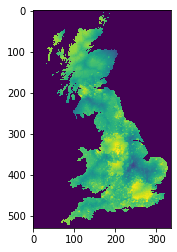

AppLayout(children=(VBox(children=(IntSlider(value=49, description='Geology'), IntSlider(value=61, description…

TypeError: plot_weighted_overlay_layer() takes 0 positional arguments but 1 was given

In [49]:
AppLayout(header=None,
          left_sidebar=None,
          center=plot_weighted_overlay_layer(),
          right_sidebar=VBox([Geology,Transport,Population,Run]),
          footer=None)

In [ ]:
# plot individual maps:

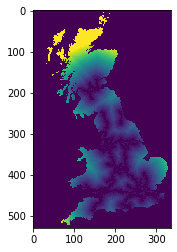

In [3]:
# plot other map layers 
# transport  layer
plt.imshow(tansport_layer)
plt.show()

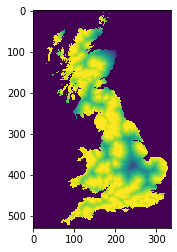

In [4]:
# geology layer
plt.imshow(geology_layer)
plt.show()

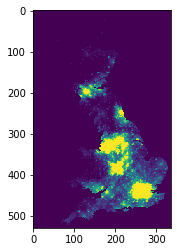

In [5]:
# population layer
plt.imshow(population_layer)
plt.show()

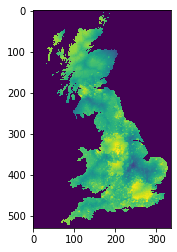

AttributeError: 'NoneType' object has no attribute 'layout'

In [57]:
grid = GridspecLayout(4, 3, height='300px')
grid[:3, 1:] =  plot_weighted_overlay_layer()
grid[:, 0] = Geology
grid[3, 1] = Transport
grid[3, 2] = Population
grid